# **Assignment 2 - Data Mining Techniques**

## Group 195

Tina Ganjipour (2857534), Karan Ramnath (2688426), Mark Bartos (2724195)

## **Step 2 - Data Exploration**

(4958347, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay         

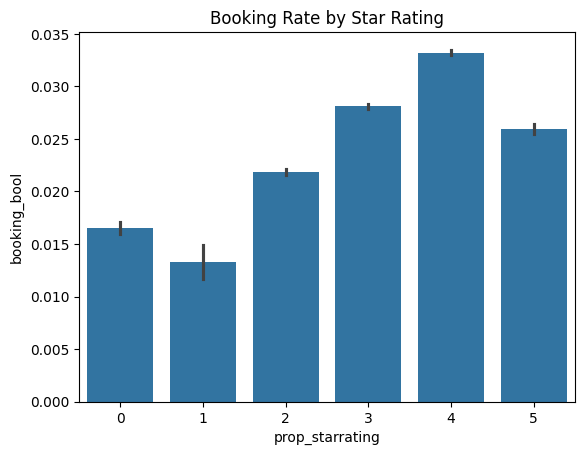

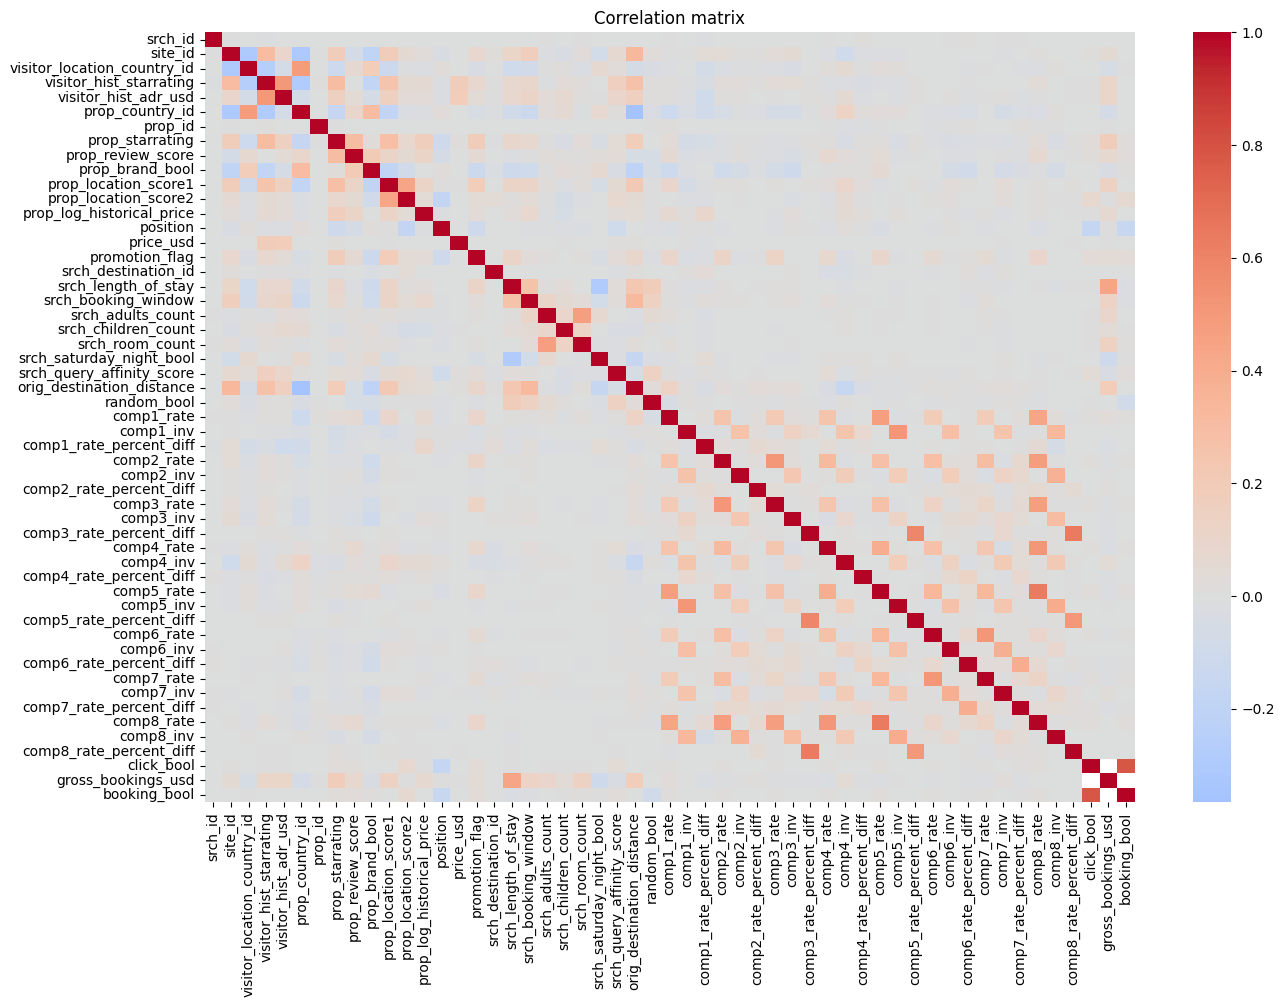

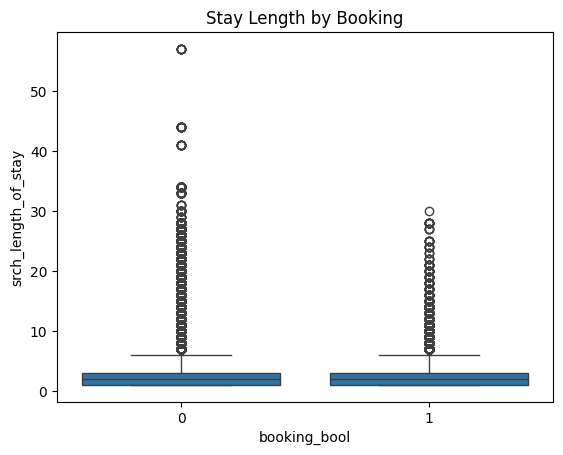

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("training_set_VU_DM.csv")

# Basic overview
print(train.shape)
print(train.info())
print(train.describe())

# Summary of missing values
missing_values = train.isnull().mean().sort_values(ascending=False)
print(missing_values[missing_values > 0])

# Booking and click rates
print(train[['booking_bool', 'click_bool']].mean())

# Booking against star rating
sns.barplot(data=train, x='prop_starrating', y='booking_bool')
plt.title("Booking Rate by Star Rating")
plt.show()

# Correlation heatmap
numerical_cols = train.select_dtypes(include='number').columns
plt.figure(figsize=(15,10))
sns.heatmap(train[numerical_cols].corr(), cmap='coolwarm', center=0)
plt.title("Correlation matrix")
plt.show()

# Distribution of length of stay and booking
sns.boxplot(x='booking_bool', y='srch_length_of_stay', data=train)
plt.title("Stay Length by Booking")
plt.show()

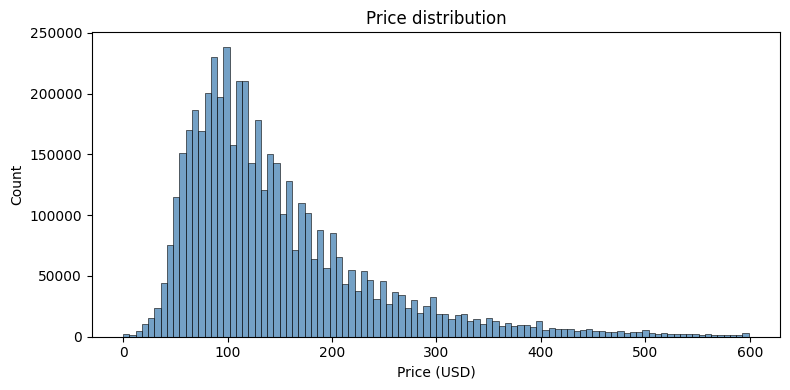

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distibution
price_clip = train['price_usd'].quantile(0.99)
filtered = train[train['price_usd'] <= price_clip]

plt.figure(figsize=(8, 4))
sns.histplot(filtered['price_usd'], bins=100, color='steelblue', edgecolor='black')
plt.xlabel("Price (USD)")
plt.title("Price distribution")
plt.tight_layout()
plt.show()

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(rc={'figure.dpi': 110})

DATA_DIR   = Path("")
TRAIN_CSV  = DATA_DIR / "training_set_VU_DM.csv"
TEST_CSV   = DATA_DIR / "test_set_VU_DM.csv"
REPORT_DIR = Path("eda_reports")
REPORT_DIR.mkdir(exist_ok=True)

# Using memory-efficient dtypes for the bigger integer columns
dtypes = {c: "int32" for c in [
    "srch_id", "site_id", "visitor_location_country_id",
    "prop_country_id", "prop_id", "prop_starrating"
]}
dtypes.update({c: "float32" for c in [
    "visitor_hist_starrating","visitor_hist_adr_usd","prop_review_score",
    "prop_location_score1","prop_location_score2","prop_log_historical_price",
    "price_usd","srch_query_affinity_score","orig_destination_distance"
]})

flags = [c for c in [
    "prop_brand_bool","promotion_flag","srch_saturday_night_bool","random_bool",
    "click_bool","booking_bool"
] if c in pd.read_csv(TRAIN_CSV, nrows=0).columns]
dtypes.update({c: "Int8" for c in flags})

# Loading the basic structure
usecols_basic = None
train = pd.read_csv(TRAIN_CSV, dtype=dtypes, parse_dates=['date_time'],
                    usecols=usecols_basic, low_memory=False)
print(f"Train shape: {train.shape}")
print(train.head())

Train shape: (4958347, 54)
   srch_id           date_time  site_id  visitor_location_country_id  \
0        1 2013-04-04 08:32:15       12                          187   
1        1 2013-04-04 08:32:15       12                          187   
2        1 2013-04-04 08:32:15       12                          187   
3        1 2013-04-04 08:32:15       12                          187   
4        1 2013-04-04 08:32:15       12                          187   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              219      893   
1                      NaN                   NaN              219    10404   
2                      NaN                   NaN              219    21315   
3                      NaN                   NaN              219    27348   
4                      NaN                   NaN              219    29604   

   prop_starrating  prop_review_score  ...  comp6_rate_percent_diff  \


### **Percentage of Missing Values**

In [3]:
def missing_report(df, max_cols=50):
    """Return %missing per column and save to csv."""
    miss = df.isna().mean().sort_values(ascending=False).to_frame("pct_missing")
    miss.to_csv(REPORT_DIR / "missing_values.csv")
    display_cols = miss.head(max_cols)
    #print(display_cols)
    return miss

missing_report(train)

,pct_missing
comp1_rate_percent_diff,0.980954
comp6_rate_percent_diff,0.980604
comp1_rate,0.975813
comp1_inv,0.973871
comp4_rate_percent_diff,0.973563
gross_bookings_usd,0.972089
comp7_rate_percent_diff,0.972064
comp6_rate,0.951565
visitor_hist_starrating,0.949204
visitor_hist_adr_usd,0.948977


### **Target distribution and class balance**

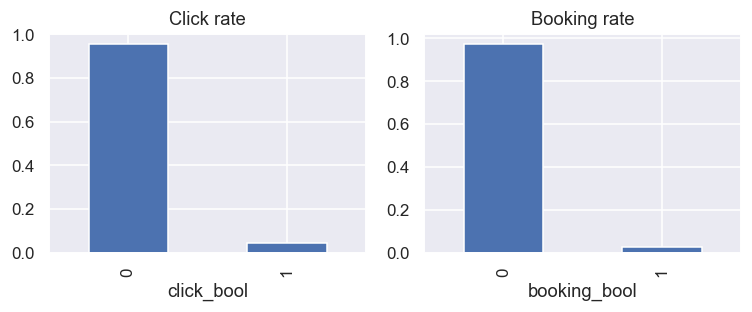

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))
train['click_bool'].value_counts(normalize=True).plot(kind='bar', ax=ax[0], title='Click rate')
train['booking_bool'].value_counts(normalize=True).plot(kind='bar', ax=ax[1], title='Booking rate')
plt.tight_layout(); plt.show()

### **Correlations (numeric features against targets)**

/Users/markbartos/Library/Mobile Documents/com~apple~CloudDocs/DRIVE/EDUCATION/VU_BSB/YEAR4 PERIOD 5/DMT/Assignment 2/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/markbartos/Library/Mobile Documents/com~apple~CloudDocs/DRIVE/EDUCATION/VU_BSB/YEAR4 PERIOD 5/DMT/Assignment 2/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/markbartos/Library/Mobile Documents/com~apple~CloudDocs/DRIVE/EDUCATION/VU_BSB/YEAR4 PERIOD 5/DMT/Assignment 2/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/markbartos/Library/Mobile Documents/com~apple~CloudDocs/DRIVE/EDUCATION/VU_BSB/YEAR4 PERIOD 5/DMT/Assignment 2/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: Runtime

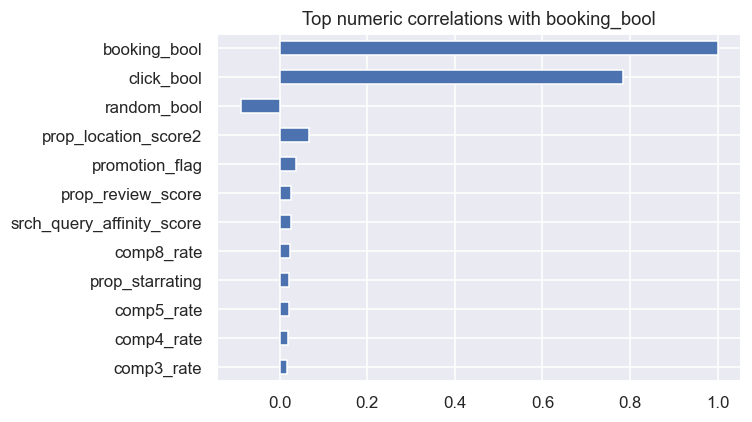

In [ ]:
num_cols = train.select_dtypes(include=['float32','float64','int32','Int8']).columns
corr_click   = train[num_cols].corrwith(train['click_bool']).sort_values(key=np.abs, ascending=False)
corr_book    = train[num_cols].corrwith(train['booking_bool']).sort_values(key=np.abs, ascending=False)

topN = 12
fig, ax = plt.subplots(figsize=(7,4))
corr_book.head(topN).plot(kind='barh', ax=ax)
ax.set_title("Top numeric correlations with booking_bool")
plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()

### **Univariate distributions and bivariate slices**

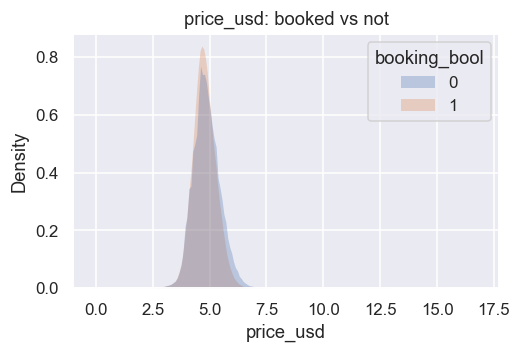

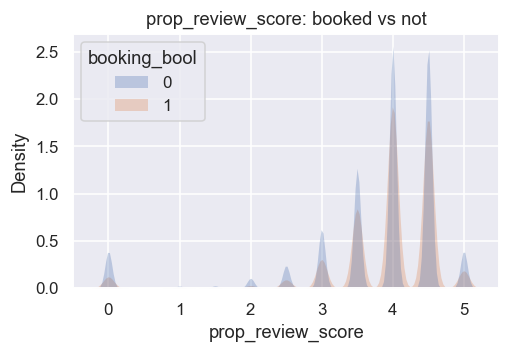

In [6]:
def kde_by_target(col, log_scale=False):
    subset = train[[col, 'click_bool', 'booking_bool']].dropna()
    if log_scale: subset[col] = np.log1p(subset[col])
    plt.figure(figsize=(5,3))
    sns.kdeplot(data=subset, x=col, hue='booking_bool', common_norm=False,
                fill=True, alpha=.3, linewidth=0)
    plt.title(f"{col}: booked vs not")
    plt.show()

kde_by_target('price_usd', log_scale=True)
kde_by_target('prop_review_score')

In [ ]:
def add_within_query_features(df):
    grp = df.groupby('srch_id')
    df['rank_price']   = grp['price_usd'].rank("dense", ascending=True)          # 1 = cheapest
    df['rank_score2']  = grp['prop_location_score2'].rank("dense", ascending=False)
    df['price_norm']   = (df['price_usd'] - grp['price_usd'].transform('mean')) / grp['price_usd'].transform('std')
    return df

train = add_within_query_features(train)

### **Position vs. target outcome**

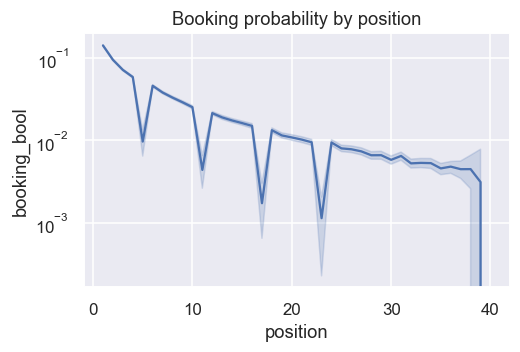

In [8]:
plt.figure(figsize=(5,3))
sns.lineplot(data=train.sample(2_000_000), x='position', y='booking_bool', estimator='mean')
plt.yscale('log')
plt.title("Booking probability by position")
plt.show()

In [9]:
def cat_ctr(col, min_cnt=5000):
    grp = train.groupby(col).agg(
        n        = (col, 'size'),
        click_r  = ('click_bool', 'mean'),
        book_r   = ('booking_bool', 'mean')
    )
    return grp[grp.n > min_cnt].sort_values('book_r', ascending=False)

country_ctr = cat_ctr('visitor_location_country_id')
country_ctr.head(10).to_csv(REPORT_DIR / "ctr_by_country.csv")

### **Competition features sanity check**

In [10]:
comp_cols = [c for c in train.columns if c.startswith('comp') and '_rate' in c]
cmp_avail = train[comp_cols].notna().mean().mean()
print(f"Competitor price coverage: {cmp_avail:.2%}")

# Collapse into a single derived signal
train['n_cheaper_comps'] = sum((train[f'comp{i}_rate'] == -1).fillna(0) for i in range(1,9))

Competitor price coverage: 14.65%


### **Exporting a light-weight EDA table**

In [11]:
summary = {
    "rows"   : len(train),
    "columns": train.shape[1],
    "missing_any" : (train.isna().any(axis=1).mean()),
    "mean_click"  : train['click_bool'].mean(),
    "mean_book"   : train['booking_bool'].mean(),
}
pd.Series(summary).to_frame("value").to_csv(REPORT_DIR / "dataset_overview.csv")

### **Correlation List and Matrix**

In [ ]:
def print_top_correlations(df, target_col, topn=20):
    numeric_cols = df.select_dtypes(include=['float32', 'float64', 'int32', 'Int8']).columns
    numeric_cols = numeric_cols.drop(target_col, errors='ignore')
    corrs = df[numeric_cols].corrwith(df[target_col])
    top_corrs = corrs.reindex(corrs.abs().sort_values(ascending=False).index)
    top_corrs = top_corrs.head(topn)

    print(f"\nTop {topn} correlations with {target_col}:\n")
    for feature, corr in top_corrs.items():
        print(f"{feature:<30} {corr:+.4f}")
    return top_corrs

top_booking_corrs = print_top_correlations(train, 'booking_bool', topn=20)
top_click_corrs   = print_top_correlations(train, 'click_bool', topn=20)


/Users/markbartos/Library/Mobile Documents/com~apple~CloudDocs/DRIVE/EDUCATION/VU_BSB/YEAR4 PERIOD 5/DMT/Assignment 2/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/markbartos/Library/Mobile Documents/com~apple~CloudDocs/DRIVE/EDUCATION/VU_BSB/YEAR4 PERIOD 5/DMT/Assignment 2/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Top 20 correlations with booking_bool:

click_bool                     +0.7829
rank_score2                    -0.1003
random_bool                    -0.0889
prop_location_score2           +0.0664
rank_price                     -0.0611
price_norm                     -0.0418
promotion_flag                 +0.0360
prop_review_score              +0.0258
srch_query_affinity_score      +0.0255
comp8_rate                     +0.0236
prop_starrating                +0.0212
comp5_rate                     +0.0208
comp4_rate                     +0.0179
comp3_rate                     +0.0163
comp2_rate                     +0.0162
comp6_rate                     +0.0115
comp7_rate                     +0.0114
comp1_rate                     +0.0101
prop_brand_bool                +0.0100
comp1_inv                      -0.0078

Top 20 correlations with click_bool:

booking_bool                   +0.7829
rank_score2                    -0.1157
prop_location_score2           +0.0738
rank_price             

/Users/markbartos/Library/Mobile Documents/com~apple~CloudDocs/DRIVE/EDUCATION/VU_BSB/YEAR4 PERIOD 5/DMT/Assignment 2/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/markbartos/Library/Mobile Documents/com~apple~CloudDocs/DRIVE/EDUCATION/VU_BSB/YEAR4 PERIOD 5/DMT/Assignment 2/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


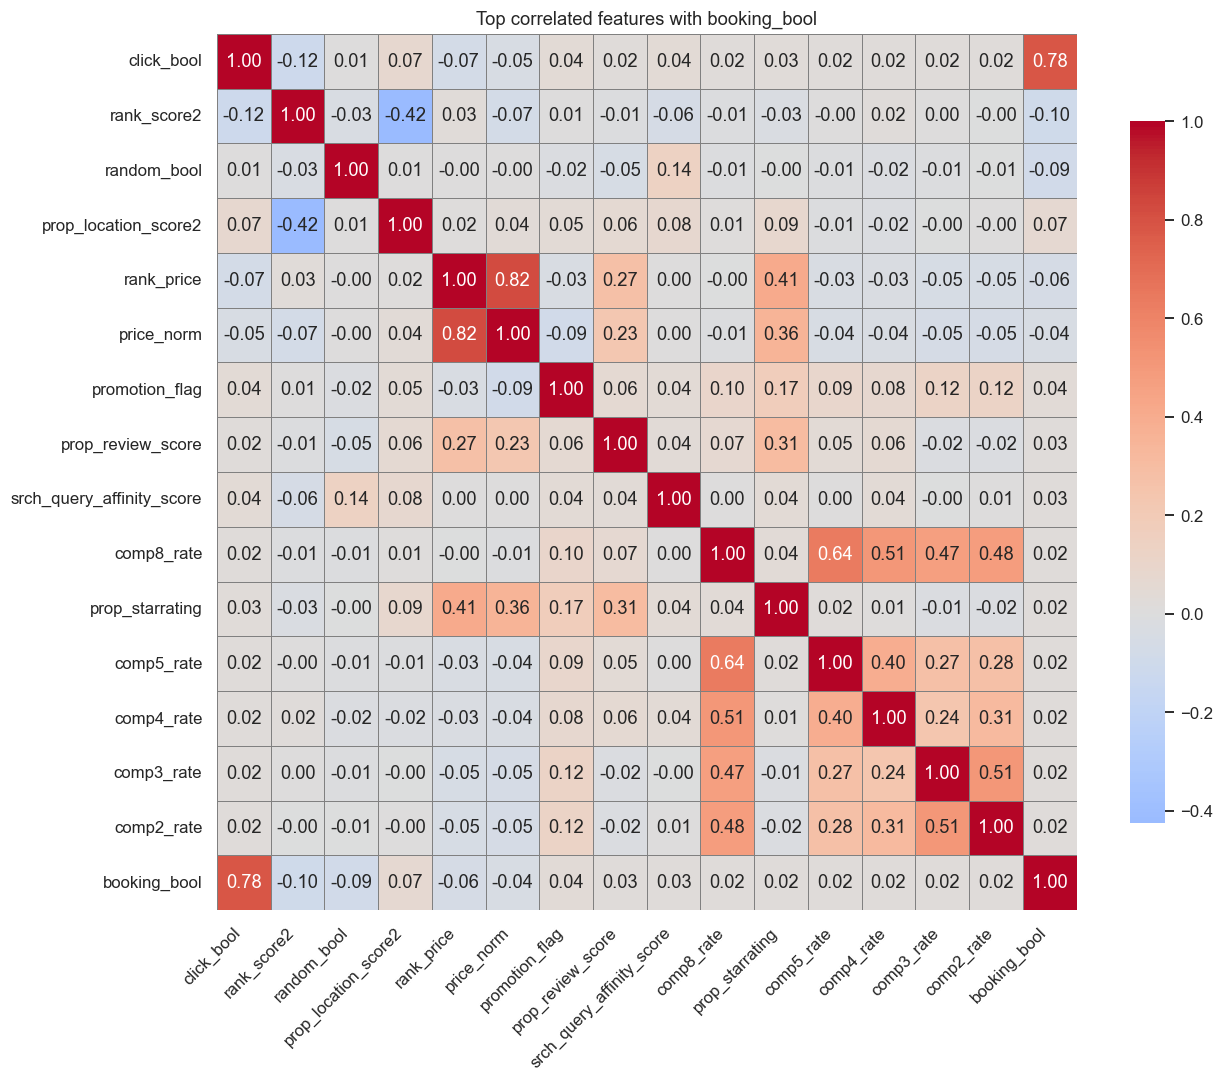

In [ ]:
numerical_cols = train.select_dtypes(include='number').columns
valid_numerical_cols = [col for col in numerical_cols if train[col].isna().mean() < 0.3]

# Focusing on top 15 values only
top_corr_features = top_booking_corrs.index.tolist()[:15] + ['booking_bool']
corr_matrix = train[top_corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})
plt.title("Top correlated features with booking_bool")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## **Task 3 - Data Cleaning**

In [ ]:
# Trim all listings above the 99th percentile of price_usd
price_cutoff = train['price_usd'].quantile(0.99)
print(f"Filtering out {((train['price_usd'] > price_cutoff).mean()*100):.2f}% of rows with price > {price_cutoff:.2f}")
train = train[train['price_usd'] <= price_cutoff].reset_index(drop=True)

train['price_decile'] = pd.qcut(train['price_usd'], 10, labels=False)

Filtering out 0.99% of rows with price > 599.00


### **Dropping columns**

**compX_rate_percent_diff, compX_inv, compX_rate except comp8_rate** removed since >95% is missing

**position** is removed, since test set lacks it

**gross_bookings_usd** won't be avaliable during prediciton time, thus removes

**The rest** will be imputed or flagged

In [ ]:
# >95 % missing  ⇒  drop
MISSING_THR = 0.95

_comp_drop = [c for c in train.columns
              if c.startswith('comp') and c != 'comp8_rate']

_hi_miss_drop = [c for c in train.columns
                 if train[c].isna().mean() > MISSING_THR
                 and c not in ('comp8_rate',)]

COLS_DROP = (
    ['position',
     'gross_bookings_usd']
    + _comp_drop
    + _hi_miss_drop
)

train.drop(columns=list(set(COLS_DROP)), inplace=True)

### **Impute + missing flags**
During EDA we saw that “no history” customers behave differently, thus the flag lets the model capture this.

In [ ]:
def impute_with_flag(df, col):
    flag = f"{col}_was_missing"
    df[flag] = df[col].isna().astype('Int8')
    median   = df[col].median()
    df[col].fillna(median, inplace=True)

numeric_na = [c for c in train.select_dtypes(include=['number']).columns
              if train[c].isna().any()]

for c in numeric_na:
    impute_with_flag(train, c)

if {'visitor_hist_starrating_was_missing',
    'visitor_hist_adr_usd_was_missing'}.issubset(train.columns):
    train['is_new_user'] = (
        (train['visitor_hist_starrating_was_missing'] == 1) &
        (train['visitor_hist_adr_usd_was_missing']   == 1)
    ).astype('Int8')

### **Within-query (search) relative features**
Because research and our own correlations show that ranks inside a single search drive clicks/bookings.

In [ ]:
grp = train.groupby('srch_id')

train['price_rank']          = grp['price_usd'].rank('dense', ascending=True)
train['loc_score2_rank']     = grp['prop_location_score2'].rank('dense', ascending=False)
train['price_z']             = (train['price_usd'] - grp['price_usd'].transform('mean')) \
                               / grp['price_usd'].transform('std')
train['starrating_diff']     = train['prop_starrating'] - grp['prop_starrating'].transform('mean')

train['n_cheaper_comps']     = (train['comp8_rate'] == -1).fillna(0).astype('int8')


### **Log / nonlinear transforms**

In [ ]:
train['log_price']         = np.log1p(train['price_usd'])
train['prop_review_score2'] = train['prop_review_score']**2
train['stay_len_log']      = np.log1p(train['srch_length_of_stay'])

### **Lightweight categorical handling**

**site_id, prop_country_id, visitor_location_country_id, prop_starrating (5 levels)** is being one-hot encoded

**prop_id, srch_destination_id** is being target-mean encoded (k-fold, on training split only)

**date_time** used to derive search_month, search_dow, search_hour then drop timestamp

In [ ]:
train['search_month'] = train['date_time'].dt.month.astype('int8')
train['search_dow']   = train['date_time'].dt.dayofweek.astype('int8')
train['search_hour']  = train['date_time'].dt.hour.astype('int8')
train.drop(columns='date_time', inplace=True)

onehot_cols  = ['site_id','prop_country_id','visitor_location_country_id',
                'prop_brand_bool','prop_starrating','search_month',
                'search_dow','search_hour','promotion_flag',
                'srch_saturday_night_bool','random_bool']
train = pd.get_dummies(train, columns=onehot_cols, drop_first=True)

### **Label & sample-weight definition**

Expedia’s grading uses NDCG@5 with bookings = 5, clicks = 1. During training we will mimic this via a simple weight. 0 values will be imputed with 0.02.

In [ ]:
train['label_grade'] = 5*train['booking_bool'] + (1-train['booking_bool'])*train['click_bool']

train['rel'] = np.select(
    [train.booking_bool == 1, train.click_bool == 1],
    [5, 1], 0
).astype('int8')

train['sample_weight'] = np.select(
    [train.booking_bool == 1, train.click_bool == 1],
    [5, 1], 0.2
).astype('float32')

### **Grouped train / validation split**

To avoid query leakage we must keep every row of a single srch_id in the same fold.

In [ ]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
train_idx, val_idx = next(gss.split(train, groups=train['srch_id']))

FEATURE_DROP = [
    'click_bool', 'booking_bool',
    'label_grade', 'rel',
    'sample_weight',
    'srch_id'
]

X_train = train.drop(columns=FEATURE_DROP).iloc[train_idx]
X_val   = train.drop(columns=FEATURE_DROP).iloc[val_idx]

y_train = train['label_grade'].iloc[train_idx]
w_train = train['sample_weight'].iloc[train_idx]


y_val   = train['label_grade'].iloc[val_idx]
w_val   = train['sample_weight'].iloc[val_idx]

### **Saving preprocessed dataset locally**

In [ ]:
X_train_fe = train.drop(columns=FEATURE_DROP).iloc[train_idx].copy()
X_train_fe['srch_id'] = train['srch_id'].iloc[train_idx].values
X_train_fe['prop_id'] = train['prop_id'].iloc[train_idx].values

X_val_fe   = X_val.copy()
X_val_fe['srch_id'] = train['srch_id'].iloc[val_idx].values
X_val_fe['prop_id'] = train['prop_id'].iloc[val_idx].values

X_train_fe.to_parquet('X_train.parquet')
X_val_fe.to_parquet('X_val.parquet')
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv',   index=False)
w_train.to_csv('w_train.csv', index=False)
w_val.to_csv('w_val.csv',   index=False)

leakage = {'booking_bool', 'click_bool', 'label_grade', 'sample_weight'} & set(X_train.columns)
assert not leakage, f"!! target leakage columns present: {leakage}"

leak_cols = {'click_bool', 'booking_bool', 'label_grade',
             'rel', 'sample_weight'} & set(X_train.columns)
assert not leak_cols, f"target leakage! {leak_cols}"

In [ ]:
import pandas as pd, numpy as np

def load_raw(path, dtypes, parse_dates=True):
    return pd.read_csv(path, dtype=dtypes,
                       parse_dates=['date_time'] if parse_dates else None,
                       low_memory=False)

def impute_with_flag(df, col):
    flag = f"{col}_was_missing"
    df[flag] = df[col].isna().astype('Int8')

    median = df[col].median()
    df[col] = df[col].fillna(median)

def preprocess(df, drop_cols, numeric_na, onehot_cols,
               train_cols=None, *, is_train=True):

    df = df.drop(columns=drop_cols, errors='ignore')

    for c in numeric_na:
        if c in df.columns:
            impute_with_flag(df, c)

    grp = df.groupby('srch_id')
    df['price_rank']      = grp['price_usd'].rank('dense')
    df['loc_score2_rank'] = grp['prop_location_score2'].rank('dense', ascending=False)
    df['price_z']         = (df['price_usd'] - grp['price_usd'].transform('mean')) / grp['price_usd'].transform('std')
    df['starrating_diff'] = df['prop_starrating'] - grp['prop_starrating'].transform('mean')
    df['n_cheaper_comps'] = (df['comp8_rate'] == -1).fillna(0).astype('int8')

    df['log_price']      = np.log1p(df['price_usd'])
    df['prop_review_score2'] = df['prop_review_score']**2
    df['stay_len_log']   = np.log1p(df['srch_length_of_stay'])

    if 'date_time' in df.columns:
        df['search_month'] = df['date_time'].dt.month.astype('int8')
        df['search_dow']   = df['date_time'].dt.dayofweek.astype('int8')
        df['search_hour']  = df['date_time'].dt.hour.astype('int8')
        df = df.drop(columns='date_time')

    df = pd.get_dummies(df, columns=[c for c in onehot_cols if c in df.columns],
                        drop_first=True)

    if is_train:
        train_cols = df.drop(columns=['srch_id', 'prop_id'], errors='ignore').columns.tolist()
        return df, train_cols
    else:
        missing = sorted(set(train_cols) - set(df.columns))
        for c in missing:
            df[c] = 0
        df = df.reindex(columns=['srch_id', 'prop_id'] + train_cols)
        return df

In [ ]:
TEST_CSV = DATA_DIR / "test_set_VU_DM.csv"

train_cols = [c for c in X_train.columns if c not in ('srch_id', 'prop_id')]

test_raw = load_raw(TEST_CSV, dtypes)
X_test_full = preprocess(test_raw,
                         drop_cols = COLS_DROP,
                         numeric_na = numeric_na,
                         onehot_cols = onehot_cols,
                         train_cols  = train_cols,
                         is_train=False)

X_test = X_test_full.drop(columns=['srch_id', 'prop_id'])
X_test.to_parquet("X_test.parquet")

X_test_full[['srch_id', 'prop_id']].to_parquet("test_ids.parquet")
print("✓ X_test.parquet and test_ids.parquet is ready.")


✓ X_test.parquet és test_ids.parquet elkészült.


## **Task 4 - Modeling and Evaluation**

#### **What types of ranking algorithms exist?**

| Algorithm                        | Type                 | Description |
|----------------------------------|----------------------|-------------|
| **Pointwise models**             | Regression-style     | Predicts a score per item, ranking is induced by sorting scores. |
| **Pairwise models**              | LambdaRank, RankNet  | Learns by comparing item pairs, tries to ensure more relevant items are ranked higher. |
| **Listwise models**              | ListNet, ListMLE     | Optimizes the entire ranking list directly. |
| **LightGBM with LambdaRank**     | Boosted trees        | Fast and scalable tree-based pairwise ranking. (**Our model**) |
| **XGBoost rank:pairwise**        | Boosted trees        | Similar to LightGBM, less optimized for ranking tasks. |
| **Neural ranking models**        | RankNet, LambdaMART  | Neural networks trained on ranking-specific loss functions. |
| **Collaborative Filtering (k-NN)** | Memory-based       | Recommends based on similar users or items, not optimized for ranking. |
| **Matrix Factorization (SVD)**   | Latent factor model  | Learns user/item embeddings, good for implicit preferences, less for top-k ranking. |

#### **Algorithms discussed in class**

- **Collaborative Filtering**
  - *User-based* (e.g. k-Nearest Neighbors)
  - *Item-based* similarity
- **Content-Based Filtering**
- **Singular Value Decomposition (SVD)**
- **Hybrid recommenders** (combining the above)
- **Heuristic Baseline** (e.g. PIZZA approach using genre/artist matching)
- **Blended Ensembles** of multiple recommenders

#### **Our final choice**

We implemented and evaluated **three distinct models**:

1. **LightGBM LambdaRank**  
   A tree-based **pairwise learning-to-rank** model, trained with `objective=lambdarank`.  
   - Predicts a ranking score for each item within a query (`srch_id`)
   - Trained to maximize **NDCG@5**, directly aligning with the competition metric
   - Considers diverse features (price, review score, location, user history, etc.)

2. **Truncated SVD (Matrix Factorization)**  
   A **collaborative filtering** model that learns latent representations of users (searches) and items (hotels) based on interaction data (clicks/bookings).  
   - Does not use side features (only user–item interaction matrix)
   - Implemented with `scikit-learn`’s `TruncatedSVD` on a sparse matrix

3. **Popularity-based baseline**  
   A simple heuristic: hotels that are historically booked or clicked more frequently are ranked higher.  
   - Based on average label grade per `prop_id`
   - Fast and interpretable baseline for comparison
   

### **An ensamble of LightGMB LambdaRank with the Populatity-baseline**

Please keep in mind, that this is the first, unoptimized version of LighGMB. The final version can be seen at the end of this notebook.

In [ ]:
# Imports
import pandas as pd, numpy as np
from pathlib import Path
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import log_loss
import lightgbm as lgb
from tqdm import tqdm

DATA_DIR   = Path('.')
SUB_PATH   = DATA_DIR / 'submission.csv'

# Loading pre-processed data from Task-3
X        = pd.read_parquet('X_train.parquet')
groups   = X.pop('srch_id')
prop_id  = X.pop('prop_id')
y        = pd.read_csv('y_train.csv')['label_grade']
wgt      = pd.read_csv('w_train.csv')['sample_weight']

sort_idx   = np.argsort(groups.values)
X_sorted   = X.iloc[sort_idx]
y_sorted   = y.iloc[sort_idx]
w_sorted   = wgt.iloc[sort_idx]
q_sorted   = groups.iloc[sort_idx].values
prop_sorted     = prop_id.iloc[sort_idx]

# Creating hold-out split with grouped queries
train_idx, val_idx = next(
    GroupShuffleSplit(n_splits=1, test_size=.15, random_state=42)
    .split(X_sorted, groups=q_sorted)
)

X_tr, X_val = X_sorted.iloc[train_idx], X_sorted.iloc[val_idx]
y_tr, y_val = y_sorted.iloc[train_idx], y_sorted.iloc[val_idx]
w_tr, w_val = w_sorted.iloc[train_idx], w_sorted.iloc[val_idx]
g_tr  = np.bincount(q_sorted[train_idx])
g_val = np.bincount(q_sorted[val_idx])
qids_val = q_sorted[val_idx]
prop_val   = prop_sorted.iloc[val_idx]

params = dict(
    objective        = 'lambdarank',
    metric           = 'ndcg',
    ndcg_eval_at     = [5],
    learning_rate    = 0.06,
    num_leaves       = 255,
    feature_fraction = 0.8,
    min_data_in_leaf = 100,
    verbose          = -1,
    seed             = 42,
)

# NDCG@k helper
def ndcg_at_k(df, k=5, label_col="label", pred_col="pred"):
    """Vectorised NDCG@k for click=1 / booking=5 grading."""
    gains = df[label_col].replace({0: 0, 1: 1, 5: 5}).values
    logs  = 1. / np.log2(np.arange(2, k + 2))
    ndcgs = []

    for _, g in df.groupby("srch_id"):
        true   = g[label_col].replace({0: 0, 1: 1, 5: 5}).values
        pred   = g.sort_values(pred_col, ascending=False)[label_col] \
                   .replace({0: 0, 1: 1, 5: 5}).values[:k]
        ideal  = np.sort(true)[::-1][:k]
        dcg    = (pred  * logs[: len(pred)]).sum()
        idcg   = (ideal * logs[: len(ideal)]).sum()
        ndcgs.append(0 if idcg == 0 else dcg / idcg)

    return float(np.mean(ndcgs))

# MODEL 1 – LightGBM LambdaRank
lgb_train = lgb.Dataset(X_tr, label=y_tr, weight=w_tr, group=g_tr, free_raw_data=False)
lgb_val   = lgb.Dataset(X_val, label=y_val, weight=w_val, group=g_val, reference=lgb_train)

print("Training LightGBM ranker (LightGBM v4 style callbacks) …")
callbacks = [
    lgb.early_stopping(stopping_rounds=50, first_metric_only=True),
    lgb.log_evaluation(period=100),
]

from sklearn.model_selection import GroupKFold
n_folds = 4
cv = GroupKFold(n_splits=n_folds)

oof_pred = np.zeros(len(X_sorted))
fold_ndcgs = []

for fold, (tr, va) in enumerate(cv.split(X_sorted, groups=q_sorted)):
    X_tr, X_va = X_sorted.iloc[tr], X_sorted.iloc[va]
    y_tr, y_va = y_sorted.iloc[tr], y_sorted.iloc[va]
    w_tr, w_va = w_sorted.iloc[tr], w_sorted.iloc[va]
    g_tr = np.bincount(q_sorted[tr])
    g_va = np.bincount(q_sorted[va])

    booster = lgb.train(params,
                        lgb.Dataset(X_tr, label=y_tr, weight=w_tr, group=g_tr),
                        num_boost_round=3000,
                        valid_sets=[lgb.Dataset(X_va, label=y_va, weight=w_va, group=g_va)],
                        callbacks=[lgb.early_stopping(50, first_metric_only=True)])
    oof_pred[va] = booster.predict(X_va)
    fold_ndcgs.append(ndcg_at_k(pd.DataFrame({"srch_id":q_sorted[va],
                                              "label":y_va,
                                              "pred":oof_pred[va]})))

print("CV NDCG@5:", np.mean(fold_ndcgs))

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=3000,
    valid_sets=[lgb_val],
    callbacks=callbacks,
)

val_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
val_df   = pd.DataFrame({"srch_id": qids_val, "label": y_val, "pred": val_pred})
print(f"LightGBM  NDCG@5 = {ndcg_at_k(val_df):.4f}")

# MODEL 2 – Simple “Collaborative-filtering popularity” baseline
# (Prop-level historical score  = 5*bookings + clicks)
hist_scores = (
    pd.DataFrame({"prop_id": prop_sorted.iloc[train_idx],
                  "label"  : y_sorted.iloc[train_idx]})
    .groupby("prop_id")["label"]
    .mean()
)

prop_val      = prop_sorted.iloc[val_idx]
baseline_pred = prop_val.map(hist_scores).fillna(0).values

val_df_b = pd.DataFrame({"srch_id": qids_val,
                         "label"  : y_val,
                         "pred"   : baseline_pred})
print(f"Popularity baseline NDCG@5 = {ndcg_at_k(val_df_b):.4f}")

# Simple weighted ensemble
from sklearn.linear_model import Ridge

blend_train = pd.DataFrame({
    "lgb": val_pred,
    "pop": baseline_pred,
})
meta = Ridge(alpha=1.0).fit(blend_train, y_val, sample_weight=w_val)
blend_pred = meta.predict(blend_train)

val_df_meta = val_df.copy()
val_df_meta["pred"] = blend_pred
print("META-blend NDCG@5 =", ndcg_at_k(val_df_meta))

# Training final model on full data and creating Kaggle submission file
print('Retraining on full data …')
full_g = groups.value_counts().sort_index().values
gbm_final = lgb.train(params,
                      lgb.Dataset(X, label=y, weight=wgt, group=full_g),
                      num_boost_round=gbm.best_iteration)

X_test  = pd.read_parquet('X_test.parquet')
test_ids = pd.read_parquet('test_ids.parquet')

print('Scoring test …')
test_pred = gbm_final.predict(X_test)
test_ids['pred'] = test_pred

sub = (test_ids
       .sort_values(['srch_id','pred'], ascending=[True,False])
       .drop(columns='pred'))
sub.to_csv(SUB_PATH, index=False)
print(f'Submission written to: {SUB_PATH.resolve()}')

Training LightGBM ranker (LightGBM v4 style callbacks) …
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's ndcg@5: nan
Evaluated only: ndcg@5
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's ndcg@5: nan
Evaluated only: ndcg@5
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's ndcg@5: nan
Evaluated only: ndcg@5
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's ndcg@5: nan
Evaluated only: ndcg@5
CV NDCG@5: 0.6516799249135127
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's ndcg@5: nan
Evaluated only: ndcg@5
LightGBM  NDCG@5 = 0.2897
Popularity baseline NDCG@5 = 0.1565
META-blend NDCG@5 = 0.28778510268290225
Retraining on full data …
Scoring test …
Submission written to: /Users/markbartos/Libr

In [ ]:
# Vaidation metrics
scores = {
    "LightGBM_val_NDCG@5"   : ndcg_at_k(val_df),
    "Popularity_val_NDCG@5" : ndcg_at_k(val_df_b),
    "Blend_val_NDCG@5"      : ndcg_at_k(val_df_meta),
}

print("\n=== Validation scores ===")
for k, v in scores.items():
    print(f"{k:<25} {v:7.4f}")

pd.Series(scores, name="NDCG@5").to_frame().to_csv("validation_scores.csv")


=== Validation scores ===
LightGBM_val_NDCG@5        0.2083
Popularity_val_NDCG@5      0.1573
Blend_val_NDCG@5           0.1550


### **Matrix Factorization (Turncated SVD, implicit CF) model**

In [ ]:
from scipy.sparse import coo_matrix
from sklearn.decomposition import TruncatedSVD

print("Building sparse interaction matrix …")

# Builing user index
u_codes = groups.astype("category").cat.codes.values
i_codes = prop_id.astype("category").cat.codes.values
n_users = u_codes.max() + 1
n_items = i_codes.max() + 1

R_full = coo_matrix((y.values.astype(np.float32), (u_codes, i_codes)),
                    shape=(n_users, n_items)).tocsr()

# 4 fold cross-validation
n_folds   = 4
cv        = GroupKFold(n_splits=n_folds)
oof_svd   = np.zeros(len(X_sorted))
fold_ndcg = []

print(f"Running {n_folds}-fold CV for SVD …")
for f, (tr, va) in enumerate(cv.split(X_sorted, groups=q_sorted), 1):
    print(f" ▸ Fold {f}")
    # Building sparse train-matrix only on training rows
    R_tr = coo_matrix((y_sorted.iloc[tr].values.astype(np.float32),
                       (u_codes[tr], i_codes[tr])),
                      shape=(n_users, n_items)).tocsr()

    svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
    user_f = svd.fit_transform(R_tr)
    item_f = svd.components_.T

    # Predicting on validation rows
    val_u  = u_codes[va]
    val_i  = i_codes[va]
    oof_svd[va] = np.einsum('ij,ij->i', user_f[val_u], item_f[val_i])

    df_va = pd.DataFrame({"srch_id": q_sorted[va],
                          "label"  : y_sorted.iloc[va],
                          "pred"   : oof_svd[va]})
    fold_ndcg.append(ndcg_at_k(df_va))
    print(f"    NDCG@5 fold = {fold_ndcg[-1]:.4f}")

print(f"\nMean CV NDCG@5 (SVD) = {np.mean(fold_ndcg):.4f}")

# Store results in the global `scores` dict
val_df_svd = pd.DataFrame({"srch_id": q_sorted,
                           "label"  : y_sorted,
                           "pred"   : oof_svd})
scores["SVD_val_NDCG@5"] = ndcg_at_k(val_df_svd)
print(f"OOF SVD NDCG@5 = {scores['SVD_val_NDCG@5']:.4f}")

Building sparse interaction matrix …
Running 4-fold CV for SVD …
 ▸ Fold 1
    NDCG@5 fold = 0.1581
 ▸ Fold 2
    NDCG@5 fold = 0.1577
 ▸ Fold 3
    NDCG@5 fold = 0.1598
 ▸ Fold 4
    NDCG@5 fold = 0.1585

Mean CV NDCG@5 (SVD) = 0.1585
OOF SVD NDCG@5 = 0.1585


### **The final, optimized LightGMB LambdaRank model**

In [ ]:
# Imports
import pandas as pd, numpy as np
from pathlib import Path
from sklearn.model_selection import GroupShuffleSplit, GroupKFold
import lightgbm as lgb, optuna
from lightgbm import Dataset, cv as lgb_cv

DATA_DIR = Path(".")
SUB_PATH = DATA_DIR / "submission.csv"

# Helper – Precise group-list
def groups_from_ordered_ids(ids):
    ids = ids.values if isinstance(ids, pd.Series) else ids
    split = np.flatnonzero(np.diff(ids)) + 1
    return np.diff(np.append([0], np.append(split, len(ids))))

# Loading and organising by srch_id
X = pd.read_parquet("X_train.parquet")
srch_id = X.pop("srch_id")
_       = X.pop("prop_id")       # modellinghez nem kell

# Label encoding
y_raw = pd.read_csv("y_train.csv")["label_grade"]          # 0 / 1 / 5
y     = y_raw.replace({5: 2}).astype("int8")               # 0 / 1 / 2

# Order by srch_id
idx = np.argsort(srch_id.values)
X_sorted  = X.iloc[idx].reset_index(drop=True)
y_sorted  = y.iloc[idx].reset_index(drop=True)
srch_sorted = srch_id.iloc[idx].reset_index(drop=True)

# Hold-out split 15 %
tr_idx, va_idx = next(GroupShuffleSplit(1, test_size=.15, random_state=42)
                      .split(X_sorted, groups=srch_sorted))

X_tr,  X_va  = X_sorted.iloc[tr_idx],    X_sorted.iloc[va_idx]
y_tr,  y_va  = y_sorted.iloc[tr_idx],    y_sorted.iloc[va_idx]
g_tr         = groups_from_ordered_ids(srch_sorted.iloc[tr_idx])
g_va         = groups_from_ordered_ids(srch_sorted.iloc[va_idx])
qid_va       = srch_sorted.iloc[va_idx].values

# 0) Random 0.5 M samle
SAMPLE_SIZE = 500_000
rng         = np.random.RandomState(42)
sample_idx  = rng.choice(len(X_sorted), size=min(500_000, len(X_sorted)), replace=False)

Xs_sub    = X_sorted.iloc[sample_idx]
ys_sub    = y_sorted.iloc[sample_idx]
srchs_sub = srch_sorted.iloc[sample_idx]

order      = np.argsort(srchs_sub.values)
Xs_sub     = Xs_sub.iloc[order].reset_index(drop=True)
ys_sub     = ys_sub.iloc[order].reset_index(drop=True)
srchs_sub  = srchs_sub.iloc[order].reset_index(drop=True)

data_sub = lgb.Dataset(
    Xs_sub,
    label = ys_sub,
    group = groups_from_ordered_ids(srchs_sub)
)
folds_sub = list(GroupKFold(3).split(Xs_sub, groups=srchs_sub))

# Optuna training
from optuna.pruners import SuccessiveHalvingPruner

static = dict(
    objective     = "lambdarank",
    metric        = "ndcg",
    ndcg_eval_at  = [5],
    label_gain    = [0, 1, 5],
    bagging_fraction = 0.8,
    bagging_freq     = 1,
    num_threads   = 8,
    seed          = 42,
    feature_pre_filter = False,
    verbose       = -1,
)

lgb_data = Dataset(
    X_sorted,
    label = y_sorted,
    group = groups_from_ordered_ids(srch_sorted)
)
folds = list(GroupKFold(3).split(X_sorted, groups=srch_sorted))

def objective(trial):
    p = {**static,
         "learning_rate"   : trial.suggest_float("lr", 5e-3, 4e-2, log=True),
         "num_leaves"      : trial.suggest_int("leaves", 64, 384, step=32),
         "min_data_in_leaf": trial.suggest_int("min_leaf", 50, 300, step=10),
         "feature_fraction": trial.suggest_float("ff", .6, 1.0),
         "bagging_fraction": trial.suggest_float("bf", .6, 1.0),
         "lambda_l1"       : trial.suggest_float("l1", 1e-8, 10.0, log=True),
         "lambda_l2"       : trial.suggest_float("l2", 1e-8, 10.0, log=True),
    }

    cv = lgb_cv(
        p,
        data_sub,
        folds       = folds_sub,
        num_boost_round=400,
        callbacks=[
            lgb.early_stopping(15, first_metric_only=True),
            lgb.log_evaluation(0),
            optuna.integration.LightGBMPruningCallback(trial, "ndcg@5"),
        ],
    )
    key = next(k for k in cv if k.endswith("-mean"))
    return max(cv[key])

study = optuna.create_study(direction="maximize",
                            pruner   = SuccessiveHalvingPruner(min_resource=50, reduction_factor=4))
study.optimize(objective, n_trials=50, show_progress_bar=True)

best = {**static, **study.best_params}
print("🔍  Best CV NDCG@5:", study.best_value)

# Hold-out training
def ndcg_at_k(df, k=5, label_col="label", pred_col="pred"):
    """Vectorised NDCG@k for click=1 / booking=5 grading."""
    gains = df[label_col].replace({0: 0, 1: 1, 5: 5}).values
    logs  = 1. / np.log2(np.arange(2, k + 2))
    ndcgs = []

    for _, g in df.groupby("srch_id"):
        true   = g[label_col].replace({0: 0, 1: 1, 5: 5}).values
        pred   = g.sort_values(pred_col, ascending=False)[label_col] \
                   .replace({0: 0, 1: 1, 5: 5}).values[:k]
        ideal  = np.sort(true)[::-1][:k]
        dcg    = (pred  * logs[: len(pred)]).sum()
        idcg   = (ideal * logs[: len(ideal)]).sum()
        ndcgs.append(0 if idcg == 0 else dcg / idcg)

    return float(np.mean(ndcgs))

gbm = lgb.train(
    best,
    Dataset(X_tr, label=y_tr, group=g_tr),
    num_boost_round=2000,
    valid_sets=[Dataset(X_va, label=y_va, group=g_va)],
    callbacks=[lgb.early_stopping(50, first_metric_only=True),
               lgb.log_evaluation(100)],
)
va_pred = gbm.predict(X_va)
val_df = pd.DataFrame({
    'srch_id': qid_va,
    'label'  : y_va,
    'pred'   : va_pred
})
print("▶️ Hold-out NDCG@5 =", ndcg_at_k(val_df))

# Creating Kaggle submission
full_g = groups_from_ordered_ids(srch_sorted)
gbm_final = lgb.train(
    best,
    Dataset(X_sorted, label=y_sorted, group=full_g),
    num_boost_round=int(gbm.best_iteration * 1.1),
)

X_test  = pd.read_parquet("X_test.parquet")
test_ids = pd.read_parquet("test_ids.parquet")
test_ids["pred"] = gbm_final.predict(X_test)

(test_ids
 .sort_values(["srch_id", "pred"], ascending=[True, False])
 .drop(columns="pred")
 .to_csv(SUB_PATH, index=False))
print("✓ submission.csv saved →", SUB_PATH.resolve())

[I 2025-05-18 15:51:56,249] A new study created in memory with name: no-name-120ddc8d-d0ed-48d0-b95f-86b6c55adae8
  0%|          | 0/50 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds


Best trial: 0. Best value: 0.971236:   2%|▏         | 1/50 [00:23<19:08, 23.44s/it]

Early stopping, best iteration is:
[79]	valid's ndcg@5: 0.971236 + 0.000294037
Evaluated only: ndcg@5
[I 2025-05-18 15:52:19,695] Trial 0 finished with value: 0.9712361734941249 and parameters: {'lr': 0.007727793599953627, 'leaves': 288, 'min_leaf': 50, 'ff': 0.7069553323144102, 'bf': 0.6892231204678174, 'l1': 0.0005530464974118888, 'l2': 1.4017940722790877e-07}. Best is trial 0 with value: 0.9712361734941249.
Training until validation scores don't improve for 15 rounds


Best trial: 0. Best value: 0.971236:   4%|▍         | 2/50 [00:38<14:39, 18.32s/it]

[I 2025-05-18 15:52:34,431] Trial 1 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 0. Best value: 0.971236:   6%|▌         | 3/50 [00:48<11:35, 14.80s/it]

[I 2025-05-18 15:52:45,044] Trial 2 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 0. Best value: 0.971236:   8%|▊         | 4/50 [01:02<11:06, 14.49s/it]

[I 2025-05-18 15:52:59,045] Trial 3 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 0. Best value: 0.971236:  10%|█         | 5/50 [01:14<10:06, 13.48s/it]

[I 2025-05-18 15:53:10,736] Trial 4 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 0. Best value: 0.971236:  12%|█▏        | 6/50 [01:26<09:28, 12.93s/it]

[I 2025-05-18 15:53:22,607] Trial 5 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 6. Best value: 0.971438:  14%|█▍        | 7/50 [01:47<11:15, 15.71s/it]

Early stopping, best iteration is:
[120]	valid's ndcg@5: 0.971438 + 0.000520317
Evaluated only: ndcg@5
[I 2025-05-18 15:53:44,048] Trial 6 finished with value: 0.9714378944790919 and parameters: {'lr': 0.017444431229470654, 'leaves': 192, 'min_leaf': 300, 'ff': 0.864234690148728, 'bf': 0.8859873735590544, 'l1': 8.406026026201066e-07, 'l2': 0.0011453012592367716}. Best is trial 6 with value: 0.9714378944790919.
Training until validation scores don't improve for 15 rounds


Best trial: 6. Best value: 0.971438:  16%|█▌        | 8/50 [01:52<08:28, 12.11s/it]

[I 2025-05-18 15:53:48,428] Trial 7 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  18%|█▊        | 9/50 [02:06<08:50, 12.94s/it]

Early stopping, best iteration is:
[105]	valid's ndcg@5: 0.971461 + 0.000363865
Evaluated only: ndcg@5
[I 2025-05-18 15:54:03,211] Trial 8 finished with value: 0.9714610018465958 and parameters: {'lr': 0.010660620230992025, 'leaves': 128, 'min_leaf': 50, 'ff': 0.6237079997175595, 'bf': 0.9911411709876258, 'l1': 1.632050874623842e-07, 'l2': 4.702085387724899e-05}. Best is trial 8 with value: 0.9714610018465958.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  20%|██        | 10/50 [02:13<07:24, 11.10s/it]

Early stopping, best iteration is:
[51]	valid's ndcg@5: 0.971169 + 0.000488823
Evaluated only: ndcg@5
[I 2025-05-18 15:54:10,189] Trial 9 finished with value: 0.9711693279260106 and parameters: {'lr': 0.013520169588575333, 'leaves': 96, 'min_leaf': 220, 'ff': 0.6997907235396353, 'bf': 0.9605765446435037, 'l1': 7.761976172587263e-05, 'l2': 0.012430667565451102}. Best is trial 8 with value: 0.9714610018465958.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  22%|██▏       | 11/50 [02:20<06:21,  9.79s/it]

Early stopping, best iteration is:
[29]	valid's ndcg@5: 0.971024 + 0.000235069
Evaluated only: ndcg@5
[I 2025-05-18 15:54:17,017] Trial 10 finished with value: 0.9710243778809703 and parameters: {'lr': 0.03929553388289872, 'leaves': 160, 'min_leaf': 130, 'ff': 0.6147878109481706, 'bf': 0.7811013280264189, 'l1': 1.265179705516919e-08, 'l2': 8.704390893819157}. Best is trial 8 with value: 0.9714610018465958.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  24%|██▍       | 12/50 [02:28<05:50,  9.22s/it]

[I 2025-05-18 15:54:24,915] Trial 11 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  26%|██▌       | 13/50 [02:40<06:08,  9.97s/it]

[I 2025-05-18 15:54:36,604] Trial 12 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  28%|██▊       | 14/50 [02:49<05:44,  9.58s/it]

[I 2025-05-18 15:54:45,302] Trial 13 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  30%|███       | 15/50 [02:54<04:51,  8.34s/it]

[I 2025-05-18 15:54:50,771] Trial 14 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  32%|███▏      | 16/50 [03:04<04:58,  8.77s/it]

[I 2025-05-18 15:55:00,533] Trial 15 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  34%|███▍      | 17/50 [03:14<05:08,  9.35s/it]

Early stopping, best iteration is:
[90]	valid's ndcg@5: 0.971395 + 0.000372844
Evaluated only: ndcg@5
[I 2025-05-18 15:55:11,224] Trial 16 finished with value: 0.9713951273391194 and parameters: {'lr': 0.03443596093039396, 'leaves': 96, 'min_leaf': 260, 'ff': 0.8033648434926672, 'bf': 0.9945159021257943, 'l1': 7.061963529550642, 'l2': 1.508999404795824e-08}. Best is trial 8 with value: 0.9714610018465958.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  36%|███▌      | 18/50 [03:21<04:32,  8.52s/it]

[I 2025-05-18 15:55:17,822] Trial 17 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  38%|███▊      | 19/50 [03:31<04:37,  8.96s/it]

[I 2025-05-18 15:55:27,793] Trial 18 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  40%|████      | 20/50 [03:40<04:25,  8.86s/it]

[I 2025-05-18 15:55:36,440] Trial 19 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  42%|████▏     | 21/50 [03:44<03:38,  7.53s/it]

[I 2025-05-18 15:55:40,848] Trial 20 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  44%|████▍     | 22/50 [03:53<03:41,  7.91s/it]

Early stopping, best iteration is:
[53]	valid's ndcg@5: 0.971278 + 0.000270421
Evaluated only: ndcg@5
[I 2025-05-18 15:55:49,640] Trial 21 finished with value: 0.9712778411269953 and parameters: {'lr': 0.03912981749884297, 'leaves': 128, 'min_leaf': 270, 'ff': 0.8132168409161278, 'bf': 0.9990864009874953, 'l1': 8.308830866236036, 'l2': 1.0791435795969121e-06}. Best is trial 8 with value: 0.9714610018465958.
Training until validation scores don't improve for 15 rounds


Best trial: 8. Best value: 0.971461:  46%|████▌     | 23/50 [03:58<03:14,  7.20s/it]

[I 2025-05-18 15:55:55,180] Trial 22 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 23. Best value: 0.971617:  48%|████▊     | 24/50 [04:15<04:17,  9.92s/it]

Early stopping, best iteration is:
[125]	valid's ndcg@5: 0.971617 + 0.000516084
Evaluated only: ndcg@5
[I 2025-05-18 15:56:11,438] Trial 23 finished with value: 0.9716172257441457 and parameters: {'lr': 0.03176412421106671, 'leaves': 128, 'min_leaf': 300, 'ff': 0.9110257713789821, 'bf': 0.9166902505419098, 'l1': 0.06337577912242051, 'l2': 0.8003831622419919}. Best is trial 23 with value: 0.9716172257441457.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  50%|█████     | 25/50 [04:35<05:29, 13.17s/it]

Early stopping, best iteration is:
[165]	valid's ndcg@5: 0.971645 + 0.000405421
Evaluated only: ndcg@5
[I 2025-05-18 15:56:32,190] Trial 24 finished with value: 0.9716453356954565 and parameters: {'lr': 0.020421028209560155, 'leaves': 128, 'min_leaf': 290, 'ff': 0.9455124035687306, 'bf': 0.9027781533186899, 'l1': 0.00624931920443784, 'l2': 0.7827877187674678}. Best is trial 24 with value: 0.9716453356954565.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  52%|█████▏    | 26/50 [04:42<04:28, 11.19s/it]

[I 2025-05-18 15:56:38,765] Trial 25 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  54%|█████▍    | 27/50 [04:54<04:19, 11.29s/it]

Early stopping, best iteration is:
[81]	valid's ndcg@5: 0.971397 + 0.000261299
Evaluated only: ndcg@5
[I 2025-05-18 15:56:50,288] Trial 26 finished with value: 0.9713968041264343 and parameters: {'lr': 0.031774866526192214, 'leaves': 128, 'min_leaf': 280, 'ff': 0.9396205101983653, 'bf': 0.9140165025733323, 'l1': 0.04550758901132695, 'l2': 0.6499364332003957}. Best is trial 24 with value: 0.9716453356954565.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  56%|█████▌    | 28/50 [04:58<03:22,  9.22s/it]

[I 2025-05-18 15:56:54,678] Trial 27 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  58%|█████▊    | 29/50 [05:06<03:03,  8.74s/it]

[I 2025-05-18 15:57:02,297] Trial 28 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  60%|██████    | 30/50 [05:19<03:24, 10.23s/it]

[I 2025-05-18 15:57:16,011] Trial 29 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  62%|██████▏   | 31/50 [05:30<03:17, 10.38s/it]

[I 2025-05-18 15:57:26,749] Trial 30 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  64%|██████▍   | 32/50 [05:39<02:57,  9.86s/it]

[I 2025-05-18 15:57:35,400] Trial 31 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  66%|██████▌   | 33/50 [05:47<02:41,  9.48s/it]

[I 2025-05-18 15:57:43,989] Trial 32 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  68%|██████▊   | 34/50 [05:54<02:17,  8.61s/it]

[I 2025-05-18 15:57:50,552] Trial 33 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  70%|███████   | 35/50 [06:02<02:05,  8.34s/it]

[I 2025-05-18 15:57:58,258] Trial 34 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  72%|███████▏  | 36/50 [06:12<02:07,  9.13s/it]

[I 2025-05-18 15:58:09,236] Trial 35 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  74%|███████▍  | 37/50 [06:22<02:01,  9.32s/it]

[I 2025-05-18 15:58:18,988] Trial 36 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  76%|███████▌  | 38/50 [06:28<01:37,  8.13s/it]

[I 2025-05-18 15:58:24,357] Trial 37 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  78%|███████▊  | 39/50 [06:41<01:47,  9.77s/it]

[I 2025-05-18 15:58:37,964] Trial 38 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  80%|████████  | 40/50 [06:48<01:28,  8.83s/it]

[I 2025-05-18 15:58:44,598] Trial 39 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  82%|████████▏ | 41/50 [06:56<01:16,  8.48s/it]

[I 2025-05-18 15:58:52,257] Trial 40 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  84%|████████▍ | 42/50 [07:06<01:13,  9.23s/it]

Early stopping, best iteration is:
[75]	valid's ndcg@5: 0.971451 + 0.00040055
Evaluated only: ndcg@5
[I 2025-05-18 15:59:03,231] Trial 41 finished with value: 0.9714510324439726 and parameters: {'lr': 0.030604992073530127, 'leaves': 128, 'min_leaf': 290, 'ff': 0.9492230188420052, 'bf': 0.9053385745621022, 'l1': 0.060654729142682315, 'l2': 1.0865574656768373}. Best is trial 24 with value: 0.9716453356954565.
Training until validation scores don't improve for 15 rounds


Best trial: 24. Best value: 0.971645:  86%|████████▌ | 43/50 [07:20<01:12, 10.39s/it]

Early stopping, best iteration is:
[123]	valid's ndcg@5: 0.971521 + 0.000360125
Evaluated only: ndcg@5
[I 2025-05-18 15:59:16,340] Trial 42 finished with value: 0.9715211898396343 and parameters: {'lr': 0.034350787013698744, 'leaves': 96, 'min_leaf': 300, 'ff': 0.956234488340932, 'bf': 0.881502122032455, 'l1': 0.07697592928018579, 'l2': 1.6616408417371433}. Best is trial 24 with value: 0.9716453356954565.
Training until validation scores don't improve for 15 rounds


Best trial: 43. Best value: 0.97173:  88%|████████▊ | 44/50 [07:31<01:04, 10.70s/it] 

Early stopping, best iteration is:
[142]	valid's ndcg@5: 0.97173 + 0.000289954
Evaluated only: ndcg@5
[I 2025-05-18 15:59:27,752] Trial 43 finished with value: 0.9717300356188318 and parameters: {'lr': 0.03408006139026723, 'leaves': 64, 'min_leaf': 290, 'ff': 0.953290754631806, 'bf': 0.9229874664375833, 'l1': 0.10125304743992519, 'l2': 1.9777435237014815}. Best is trial 43 with value: 0.9717300356188318.
Training until validation scores don't improve for 15 rounds


Best trial: 43. Best value: 0.97173:  90%|█████████ | 45/50 [07:42<00:54, 10.83s/it]

Early stopping, best iteration is:
[137]	valid's ndcg@5: 0.971672 + 0.000282519
Evaluated only: ndcg@5
[I 2025-05-18 15:59:38,882] Trial 44 finished with value: 0.9716720592298387 and parameters: {'lr': 0.035377797952718504, 'leaves': 64, 'min_leaf': 260, 'ff': 0.9888010314749961, 'bf': 0.9460933436501406, 'l1': 0.3024414616289943, 'l2': 3.128471099812748}. Best is trial 43 with value: 0.9717300356188318.
Training until validation scores don't improve for 15 rounds


Best trial: 43. Best value: 0.97173:  92%|█████████▏| 46/50 [07:46<00:35,  8.89s/it]

[I 2025-05-18 15:59:43,239] Trial 45 pruned. Trial was pruned at iteration 50.
Training until validation scores don't improve for 15 rounds


Best trial: 43. Best value: 0.97173:  94%|█████████▍| 47/50 [07:55<00:26,  8.86s/it]

Early stopping, best iteration is:
[99]	valid's ndcg@5: 0.971493 + 0.000277903
Evaluated only: ndcg@5
[I 2025-05-18 15:59:52,046] Trial 46 finished with value: 0.9714930839641133 and parameters: {'lr': 0.028058016839258307, 'leaves': 64, 'min_leaf': 300, 'ff': 0.9793518542297324, 'bf': 0.8769681962511917, 'l1': 1.8686032413045293, 'l2': 0.20904675696630673}. Best is trial 43 with value: 0.9717300356188318.
Training until validation scores don't improve for 15 rounds


Best trial: 43. Best value: 0.97173:  96%|█████████▌| 48/50 [08:04<00:17,  8.90s/it]

Early stopping, best iteration is:
[75]	valid's ndcg@5: 0.971325 + 0.000384758
Evaluated only: ndcg@5
[I 2025-05-18 16:00:01,019] Trial 47 finished with value: 0.9713252230221942 and parameters: {'lr': 0.03525262026891246, 'leaves': 96, 'min_leaf': 280, 'ff': 0.9595178727917792, 'bf': 0.9229533142821127, 'l1': 0.008065260537611961, 'l2': 0.06481151216554398}. Best is trial 43 with value: 0.9717300356188318.
Training until validation scores don't improve for 15 rounds


Best trial: 43. Best value: 0.97173:  98%|█████████▊| 49/50 [08:14<00:09,  9.11s/it]

Early stopping, best iteration is:
[110]	valid's ndcg@5: 0.971503 + 0.000373012
Evaluated only: ndcg@5
[I 2025-05-18 16:00:10,616] Trial 48 finished with value: 0.9715034636264424 and parameters: {'lr': 0.03330519009292283, 'leaves': 64, 'min_leaf': 250, 'ff': 0.9277734777776824, 'bf': 0.9535423264638242, 'l1': 0.20974669367305895, 'l2': 2.164244526445858}. Best is trial 43 with value: 0.9717300356188318.
Training until validation scores don't improve for 15 rounds


Best trial: 43. Best value: 0.97173: 100%|██████████| 50/50 [08:27<00:00, 10.15s/it]

Early stopping, best iteration is:
[123]	valid's ndcg@5: 0.971589 + 0.00051892
Evaluated only: ndcg@5
[I 2025-05-18 16:00:23,893] Trial 49 finished with value: 0.9715891666855363 and parameters: {'lr': 0.038532283655079734, 'leaves': 96, 'min_leaf': 290, 'ff': 0.9989981932259068, 'bf': 0.9757650849124638, 'l1': 0.08107640744577486, 'l2': 5.5454993236342185}. Best is trial 43 with value: 0.9717300356188318.
🔍  Best CV NDCG@5: 0.9717300356188318


Training until validation scores don't improve for 50 rounds
[100]	valid_0's ndcg@5: 0.383661
[200]	valid_0's ndcg@5: 0.387802
[300]	valid_0's ndcg@5: 0.389635
[400]	valid_0's ndcg@5: 0.39047
[500]	valid_0's ndcg@5: 0.390718
Early stopping, best iteration is:
[476]	valid_0's ndcg@5: 0.390859
Evaluated only: ndcg@5
▶️ Hold-out NDCG@5 = 0.38743325077389384
✓ submission.csv saved → /Users/markbartos/Library/Mobile Documents/com~apple~CloudDocs/DRIVE/EDUCATION/VU_BSB/YEAR4 PERIOD 5/DMT/Assignment 2/dmt-2025-2nd-assignment/submission.csv
